# Train Validation Test Set Split

**Description**: Split the complete dataset into three sets: train, validation and test. The split is vertical, i.e. devices are unique to a subset and are not shared between the different phases of the model training, hyperparameter tuning and testing.

**Inputs**: `data/binary/*`, `data/hex/*`

**Outputs**: `data/train_test/binary_train.csv`, `data/train_test/binary_validate.csv`, `data/train_test/binary_test.csv`, `data/train_test/hex_train.csv`, `data/train_test/hex_validate.csv`, `data/train_test/hex_test.csv`

| Train                         | Test                       |
|-------------------------------|----------------------------|
| iPhone7_X                      | iPhoneXR_U                 |
| iPhone7_F                      | GooglePixel3A_L            |
| OnePlusNord_O                  | GooglePixel3A_V            |
| SamsungS7_I                    | XiaomiRedmi5_J             |
| XiaomiRedmiNote7_S             | XiaomiRedmi4_B            |
| iPhone6_N                      | iPhone12Pro_C              |
| iPhoneXSMax_M                  | SamsungS6_H                |
| XiaomiRedmiNote9S_T            | iPhone11_F                 |
| XiaomiA2_E                     | S21Ultra_M                 |
| iPhone12_M                     | HuaweiP20_G                |
| iPhone11_C                     | SamsungS4_C                |
| iPhone12_W                     |             |
| iPhone11_B                     |                 |
| iPhone11_M                     |                  |
| HuaweiL21_D                    |             |
| OppoFindX3Neo_A                |                 |
| iPhoneXR_A                     |                |
| iPhoneXR_L                     |                 |
| HuaweiHonor9_R                 |                            |
| SamsungJ6_K                    |                            |
| SamsungM31_A                   |                            |
| HuaweiP10_Q                    |                            |


## Notebook Setup

### Libraries

In [1]:
import fancyData
import fancyPlots
import pandas as pd
from rich import traceback
from rich.progress import Progress

In [2]:
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x110c967e0>>

### Configurations

In [3]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

## Device Sets

In [4]:
train_devices = [
    "iPhone7_X",
    "iPhone7_F",
    "OnePlusNord_O",
    "SamsungS7_I",
    "XiaomiRedmiNote7_S",
    "iPhone6_N",
    "iPhoneXSMax_M",
    "XiaomiRedmiNote9S_T",
    "XiaomiA2_E",
    "iPhone12_M",
    "iPhone11_C",
    "iPhone12_W",
    "iPhone11_B",
    "iPhone11_M",
    "HuaweiL21_D",
    "OppoFindX3Neo_A",
    "iPhoneXR_A",
    "iPhoneXR_L",
    "HuaweiHonor9_R",
    "SamsungJ6_K",
    "SamsungM31_A",
    "HuaweiP10_Q",
]

test_devices = [
    "iPhoneXR_U",
    "GooglePixel3A_L",
    "GooglePixel3A_V",
    "XiaomiRedmi5_J",
    "XiaomiRedmi4_B",
    "iPhone12Pro_C",
    "SamsungS6_H",
    "iPhone11_F",
    "S21Ultra_M",
    "HuaweiP20_G",
    "SamsungS4_C",
    "OppoFindX3Neo_A",
    "iPhoneXR_A",
    "iPhoneXR_L",
    "HuaweiHonor9_R",
    "SamsungJ6_K",
    "SamsungM31_A",
    "HuaweiP10_Q",
]


## HEX Data

In [5]:
hex_path = config["DEFAULT"]["hex_path"]
df_hex = fancyData.load_and_concat_csv(hex_path)

In [6]:
df_hex

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,1684590721.864466,d2:6b:aa:b5:fb:ed,1,1,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
1,1684590721.884716,d2:6b:aa:b5:fb:ed,1,1,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
2,1684590721.910542,d2:6b:aa:b5:fb:ed,6,6,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
3,1684590721.930789,d2:6b:aa:b5:fb:ed,6,6,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
4,1684590721.968746,d2:6b:aa:b5:fb:ed,11,11,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76699,1623847860.708628,ec:9b:f3:75:8e:40,11,9,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H
76700,1623847860.732495,ec:9b:f3:75:8e:40,11,10,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H
76701,1623847860.752909,ec:9b:f3:75:8e:40,11,10,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H
76702,1623847860.776777,ec:9b:f3:75:8e:40,11,11,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H


In [7]:
df_train_hex = df_hex[df_hex["Label"].isin(train_devices)]
df_test_hex = df_hex[df_hex["Label"].isin(test_devices)]

In [ ]:
from sklearn.utils import resample

# Separate the entries with label 'XiaomiRedmiNote7_S'
df_xiaomi = df_train_hex[df_train_hex["Label"] == "XiaomiRedmiNote7_S"]

# Undersample to 2000 entries
df_xiaomi_undersampled = resample(
    df_xiaomi, replace=False, n_samples=2000, random_state=42
)

# Combine with the rest of the data
df_train_hex = pd.concat(
    [
        df_train_hex[df_train_hex["Label"] != "XiaomiRedmiNote7_S"],
        df_xiaomi_undersampled,
    ]
)

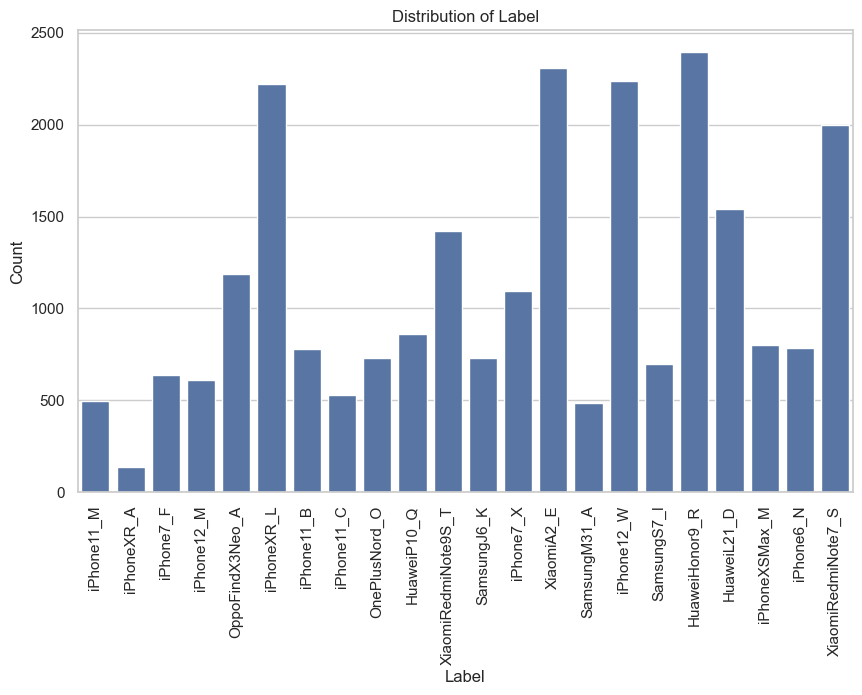

In [9]:
fancyPlots.plot_label_distribution(df_train_hex, "Label")